In [1]:
#all imports for project 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from env import get_db_url
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# our own acquire script:
import acquire 

import prep

#alpha will equal .05 for all statistical tests
a = .05

np.random.seed(100)

In [2]:
df = acquire.new_telco_data()


In [3]:
train, validate, test = prep.prep_telco_data(df)

/Users/allantestaten/codeup-data-science/classification-exercises/classification_project/class project/prep.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_charges'] = df.total_charges.astype(float)
/Users/allantestaten/codeup-data-science/classification-exercises/classification_project/class project/prep.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_female'] = df.gender.map({'Female': 1, 'Male': 0})
/Users/allantestaten/codeup-data-science/classification-exercises/classificatio

# How often do customers churn?

(array([3871.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1402.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

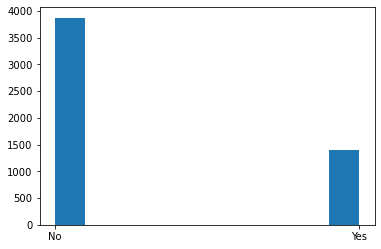

In [4]:
train.churn.value_counts(normalize=True)

plt.hist(train.churn)


## The above graph shows that customers churn 26% of the time. So it is more likely for a customer to stay with the company than not to. 

# Is there an association between churn and Internet Service Type? 

In [5]:
list(train.columns)

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'is_female',
 'has_partner',
 'has_dependents',
 'has_phone_service',
 'has_paperless_billing',
 'has_churned',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'contract_type_O

In [6]:
# cross tab created in preparation to run chi^2 test
#service type ID 1 = DSL internet, 2 = Fiber Optic, 3 = No internet
observed = pd.crosstab(train.churn, train.internet_service_type_id)
observed

internet_service_type_id,1,2,3
churn,,,
No,1487,1327,1057
Yes,337,984,81


In [7]:
#code to generate results of chi^2 test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

8.130192076012108e-128

In [8]:
#output of values observed and expected values from test
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[1487 1327 1057]
 [ 337  984   81]]

Expected
[[1339 1696  835]
 [ 484  614  302]]

----
chi^2 = 585.2706
p     = 8.130192076012108e-128


# FINDINGS 
### The results of the chi^2 test support the idea that there is an association between churn and the internet service type

# Is there an association between churn and having phone service? 

In [9]:
# cross tab created in preparation to run chi^2 test
observed = pd.crosstab(train.churn, train.phone_service)
observed

phone_service,No,Yes
churn,,
No,395,3476
Yes,124,1278


In [10]:
#code to generate results of chi^2 test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

0.1579813801645912

In [11]:
#output of values observed and expected values from test
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[ 395 3476]
 [ 124 1278]]

Expected
[[ 381 3489]
 [ 137 1264]]

----
chi^2 = 1.9934
p     = 0.1579813801645912


# FINDINGS 
### The results of the chi^2 test support the idea that there is not an association between churn and the phone service

# Is there an association between churn and having techinical support?

These are two categorical variables so I will use a chi^2 test to determine if there is an association between the two variables. 

In [12]:
# cross tab created in preparation to run chi^2 test
observed = pd.crosstab(train.churn, train.tech_support)
observed

tech_support,No,No internet service,Yes
churn,,,
No,1504,1057,1310
Yes,1092,81,229


In [13]:
#code to generate results of chi^2 test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

2.2865581269117635e-141

In [14]:
#output of values observed and expected values from test
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[1504 1057 1310]
 [1092   81  229]]

Expected
[[1905  835 1129]
 [ 690  302  409]]

----
chi^2 = 647.6749
p     = 2.2865581269117635e-141


# FINDINGS 
### The results of the chi^2 test support the idea that there is an association between churn and a customer having technical support

# Is there an association between churn and having fiber optic internet?

These are two categorical variables so I will use a chi^2 test to determine if there is an association between the two variables. 

In [15]:
# cross tab created in preparation to run chi^2 test
observed = pd.crosstab(train['churn'], train['internet_service_type_Fiber optic'])
observed

internet_service_type_Fiber optic,0,1
churn,,
No,2544,1327
Yes,418,984


In [16]:
#code to generate results of chi^2 test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

6.608799714670794e-119

In [17]:
#output of values observed and expected values from test
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[2544 1327]
 [ 418  984]]

Expected
[[2174 1696]
 [ 787  614]]

----
chi^2 = 537.4962
p     = 6.608799714670794e-119


# FINDINGS 
### The results of the chi^2 test support the idea that there is an association between churn and a customer having fiber optic internet service.

# Is there an association between churn and contract type?



In [18]:
# cross tab created in preparation to run chi^2 test
observed = pd.crosstab(train.churn, train.contract_type_id)
observed



contract_type_id,1,2,3
churn,,,
No,1652,998,1221
Yes,1238,127,37


In [19]:
#code to generate results of chi^2 test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

3.595868861996222e-193

In [20]:
#output of values observed and expected values from test
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[1652  998 1221]
 [1238  127   37]]

Expected
[[2121  825  923]
 [ 768  299  334]]

----
chi^2 = 886.2383
p     = 3.595868861996222e-193


# FINDINGS 
### The results of the chi^2 test support the idea that there is an association between churn and contract type.

####  Addressing nulls 
No nulls in data set before modeling 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

# Start building Models 

In [22]:
# Size of samples that will be evaluated 
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (5273, 51)
Validate: (1055, 51)
Test: (704, 51)


## Model 1 Decision Tree 

In [23]:
train

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5783,1,1,3,8144-DGHXP,Female,0,No,No,54,Yes,...,1,0,1,0,1,0,0,0,1,0
6596,1,1,1,9373-WSLOY,Male,1,Yes,No,33,No,...,1,0,0,0,0,0,0,0,1,0
5340,3,2,2,7544-ZVIKX,Male,0,Yes,Yes,58,Yes,...,1,0,1,1,0,1,0,0,0,0
5311,4,2,1,7503-QQRVF,Male,1,Yes,No,16,Yes,...,0,0,0,0,0,1,0,1,0,0
3328,1,2,1,4741-WWJQZ,Female,0,Yes,No,2,Yes,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,3,2,1,1845-CSBRZ,Female,1,Yes,Yes,22,Yes,...,1,0,0,0,0,1,0,0,0,0
6495,1,1,2,9209-NWPGU,Male,0,No,No,44,Yes,...,1,0,0,1,0,0,0,0,1,0
5616,2,1,1,7909-FIOIY,Female,0,Yes,Yes,19,No,...,0,0,0,0,0,0,0,0,0,1
6830,2,2,1,9701-CDXHR,Female,0,Yes,No,51,Yes,...,0,0,0,0,0,1,0,0,0,1


In [24]:
#Selected the columns I will use for model 
features = ['tech_support_Yes','contract_type_One year', 'contract_type_Two year','internet_service_type_Fiber optic',]
X_train = train[features]
X_train

,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic
5783,1,0,1,0
6596,1,0,0,0
5340,1,1,0,1
5311,0,0,0,1
3328,1,0,0,1
...,...,...,...,...
1246,0,0,0,1
6495,1,1,0,0
5616,0,0,0,0
6830,0,0,0,1


In [25]:
#look at all columns 
list(train.columns)

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'is_female',
 'has_partner',
 'has_dependents',
 'has_phone_service',
 'has_paperless_billing',
 'has_churned',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'contract_type_O

In [26]:

features = ['tech_support_Yes','contract_type_One year', 'contract_type_Two year','internet_service_type_Fiber optic',]
X_train = train[features]
y_train = train['has_churned']


1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [27]:
y_train.value_counts()

0    3871
1    1402
Name: has_churned, dtype: int64

In [28]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


Below is where I am fitting my decision tree classifier to my training sample 

In [29]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=100)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Evaluating model on training sample
y_predictions = tree1.predict(X_train)

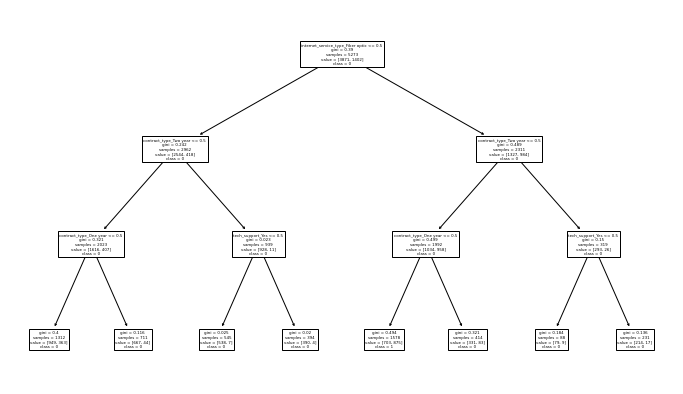

In [30]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

Evaluating in-sample results using the model score, confusion matrix, and classification report.

In [31]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.77


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


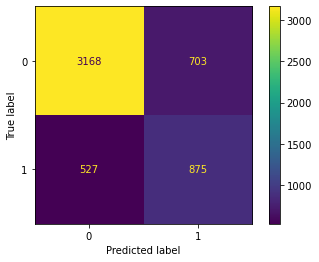

In [32]:
plot_confusion_matrix(tree1, X_train, y_train)


In [33]:
print(classification_report(y_train, y_predictions))


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3871
           1       0.55      0.62      0.59      1402

    accuracy                           0.77      5273
   macro avg       0.71      0.72      0.71      5273
weighted avg       0.78      0.77      0.77      5273



In [34]:
# Classification report on actual y values and  model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.857375,0.554499,0.766736,0.705937,0.776845
recall,0.818393,0.624108,0.766736,0.721251,0.766736
f1-score,0.837431,0.587248,0.766736,0.712339,0.770911
support,3871.000000,1402.000000,0.766736,5273.000000,5273.000000


In [35]:
#Priting values of True Negative, False Positive, False Negative and True Positive 
# True Negative is predict don't churn and they don't churn 
# False Positive is predict they don't churn and they do 
# False Negative is predict they don't churn and they churn
# True positive is predict they churn and they churn

TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

TN, FP, FN, TP

(3168, 703, 527, 875)

In [36]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 3871
Positive Cases: 1402
0    3871
1    1402
Name: has_churned, dtype: int64


Have designated churn as positive case

In [37]:
#Transforming classification metrics into more readable format

ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7667362032998293 

True Positive Rate/Sensitivity/Recall/Power: 0.6241084165477889 

False Positive Rate/False Alarm Ratio/Fall-out: 0.18160681994316713 

True Negative Rate/Specificity/Selectivity: 0.8183931800568328 

False Negative Rate/Miss Rate: 0.37589158345221113 

Precision/PPV: 0.5544993662864385 

F1 Score: 0.587248322147651 

Support (0): 3871 

Support (1): 1402


# Model 2 Random Forrest 


In [38]:
# creating Random Forrest classifier, algorithm

rf = RandomForestClassifier(
    min_samples_leaf=1, 
    max_depth=10, 
    random_state=100
)

In [39]:
# Fit model to sample data

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=100)

In [40]:
#creating predictions from training sample 
y_preds = rf.predict(X_train)

Evaluating in-sample results using the model score, confusion matrix, and classification report.

In [41]:
rf.score(X_train, y_train)

0.7752702446425185

In [42]:
#confusion array 
confusion_matrix(y_train, y_preds)

array([[3315,  556],
       [ 629,  773]])

In [43]:
print(classification_report(y_train, y_preds))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3871
           1       0.58      0.55      0.57      1402

    accuracy                           0.78      5273
   macro avg       0.71      0.70      0.71      5273
weighted avg       0.77      0.78      0.77      5273



####  Transforming Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support into more reader friendly format


In [44]:
TN, FP, FN, TP = confusion_matrix(y_train,y_preds).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7752702446425185
True Positive Rate: 0.551355206847361
False Positive Rate: 0.14363213639886335
True Negative Rate: 0.8563678636011367
False Negative Rate: 0.4486447931526391
Precision: 0.581640331075997
Recall: 0.551355206847361
F1 Score: 0.5660930062248261
Support (0): 1402
Support (1): 3871


In [45]:
# Attempt to optimize model 
rf = RandomForestClassifier(
    min_samples_leaf=5, 
    max_depth=10, 
    random_state=100
)

In [46]:
# Fit model to sample data

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=100)

In [47]:
## Evaluating model on sample data 
rf.score(X_train, y_train)

0.7752702446425185

# Model 3 KNN 

Fitting K-Nearest Neighbors classifier to training sample and making predictions

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [49]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
y_preds = knn.predict(X_train)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
# Evaluating results of model, confusion matrix, and classification report.

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.73


# Model 4 KNN (changed features)

In [52]:
# identifying columns that will be used in training for model 
features = ['internet_service_type_Fiber optic']
y_train = train['has_churned']

In [53]:
# call knn algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [54]:
# Fit training sample to model 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
#generate predictions form train sample 
y_preds = knn.predict(X_train)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
# Evaluating results of model, confusion matrix, and classification report.

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.73


In [67]:
confusion_matrix(y_train, y_preds)


array([[3724,  147],
       [1300,  102]])

In [58]:
print(classification_report(y_train, y_preds))


              precision    recall  f1-score   support

           0       0.74      0.96      0.84      3871
           1       0.41      0.07      0.12      1402

    accuracy                           0.73      5273
   macro avg       0.58      0.52      0.48      5273
weighted avg       0.65      0.73      0.65      5273



# Model 5 Logistic Regression

In [59]:
features = ['tech_support_Yes','contract_type_One year', 'contract_type_Two year','internet_service_type_Fiber optic',]
X_train = train[features]
y_train = train['has_churned']

In [60]:
# Define the logistic regression model

logit = LogisticRegression(random_state=100)

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 0.73
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.78


# Evaluate Best Models on Validate Set 

In [71]:
# Decision Tree Model one performance on validate 

#Features for Model
features = ['tech_support_Yes','contract_type_One year', 'contract_type_Two year','internet_service_type_Fiber optic',]
X_validate = validate[features]
y_validate = validate['has_churned']

# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=100)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Evaluating model on Evaluate sample
y_predictions = tree1.predict(X_validate)

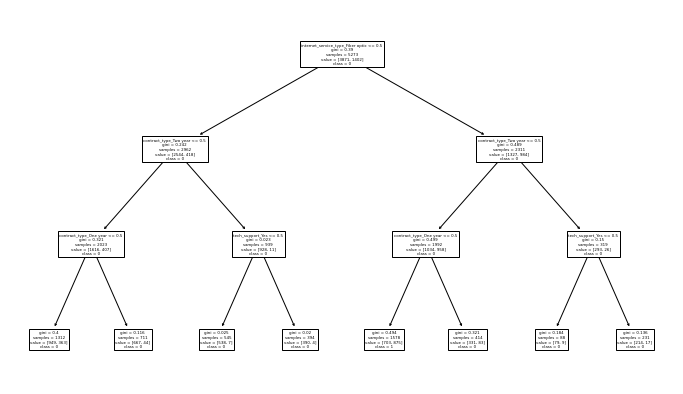

In [72]:
# Visual of decision tree
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_validate.columns, class_names=['0','1'])
plt.show()

In [73]:
# Evaluating model score against validate model

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.74


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


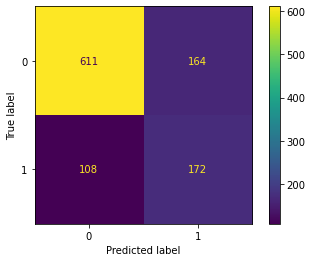

In [76]:
plot_confusion_matrix(tree1, X_validate, y_validate)


In [77]:
print(classification_report(y_validate, y_predictions))


              precision    recall  f1-score   support

           0       0.85      0.79      0.82       775
           1       0.51      0.61      0.56       280

    accuracy                           0.74      1055
   macro avg       0.68      0.70      0.69      1055
weighted avg       0.76      0.74      0.75      1055



In [78]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_validate, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.849791,0.511905,0.74218,0.680848,0.760115
recall,0.788387,0.614286,0.74218,0.701336,0.742180
f1-score,0.817938,0.558442,0.74218,0.688190,0.749067
support,775.000000,280.000000,0.74218,1055.000000,1055.000000


In [79]:
# creating readable output for audience
TN, FP, FN, TP = confusion_matrix(y_validate, y_predictions).ravel()

TN, FP, FN, TP

negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_validate.value_counts())

ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Negative Cases: 775
Positive Cases: 280
0    775
1    280
Name: has_churned, dtype: int64
Accuracy: 0.7421800947867299 

True Positive Rate/Sensitivity/Recall/Power: 0.6142857142857143 

False Positive Rate/False Alarm Ratio/Fall-out: 0.21161290322580645 

True Negative Rate/Specificity/Selectivity: 0.7883870967741935 

False Negative Rate/Miss Rate: 0.38571428571428573 

Precision/PPV: 0.5119047619047619 

F1 Score: 0.5584415584415584 

Support (0): 775 

Support (1): 280


Sklearn is calling churned customer (1) our positive case


# Model 2 Logistic Regression Performance on validate dataset

In [80]:
features = ['tech_support_Yes','contract_type_One year', 'contract_type_Two year','internet_service_type_Fiber optic',]
X_validate = validate[features]
y_validate = validate['has_churned']

In [82]:
# Define the logistic regression model

logit = LogisticRegression(random_state=100)

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_validate[features], y_validate)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_validate[features])

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
     .format(logit.score(X_validate[features], y_validate)))

Baseline is 0.73
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on validate set: 0.76


# Findings 

Based on the performance of the two best models on the validate set the best model is the logistic Regression model 